___
# Foreword: 
***This exercise was part of my Machine Learning course from Pierian Data Inc. I have included this in my portfolio because it demonstrates the techniques I learned through the course. I have deleted sections, added my code solution, added comments to the code, and added steps that were not part of the original exercise.I have conclusion comments at the end.***

___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 


------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

I start by importing in the libraries that I might need as I go through the project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I read in the data file using pandas and the file name.

In [5]:
df = pd.read_csv('DATA/Telco-Customer-Churn.csv')

Then I take a quick look at the DataFrame first couple of lines to make sure the file read in fine.

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [6]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


It looks like there is no missing data. The data is a mix of ojects and intigers.

**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

I use the .describe() method as suggested by the instructor to look at the statistics of the data set.

In [7]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The "SeniorCitizen" column has something going on there. The 25%, 50%, and 75% are 0.

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

I use the .isnull() method to check for "NaN" in all the columns. Then add the .sum() method to add up all the True or False values that the .isnull method generated.

In [8]:
# CODE HERE
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This shows there is no missing data.

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

I use the seborn .countplot to plot the "Churn" column's two categories in a bar plot. 

<AxesSubplot:xlabel='Churn', ylabel='count'>

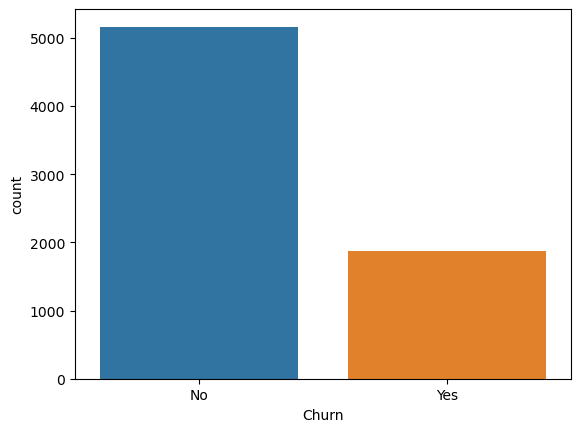

In [9]:
# CODE HERE
sns.countplot(data=df,x='Churn')

This allows me to see there are more than double 'No' in the 'Churn' than 'Yes'.

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

I used the seaborn boxplot method to plot the 'TotalCharges' against 'Churn'.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

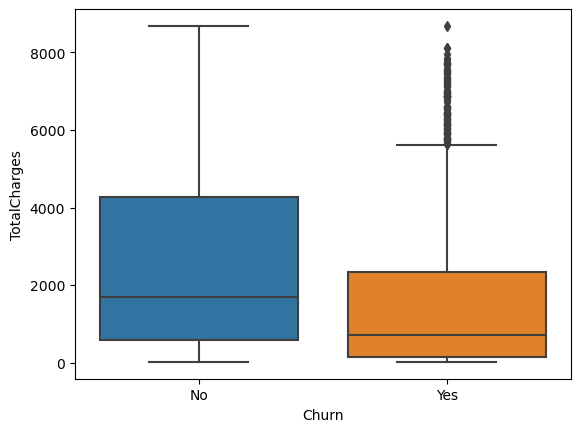

In [10]:
# CODE HERE
sns.boxplot(data=df,x='Churn',y='TotalCharges')

The box plot allows me to see how the data is grouped and if there are outliers

The instructions were to create a box plot or a violin plot. I chose to create both. I used seaborn to generate the violin plot.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

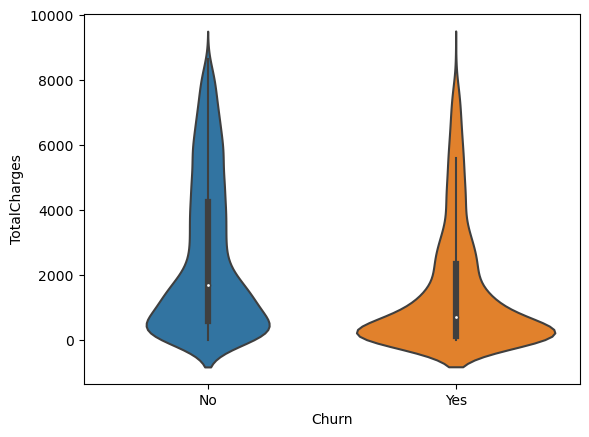

In [11]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

The violin plot helps me visually understand the density of the data and rough idea of where the median lies.

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

I use seaborn again to generate the requested box plot. This plot compares 'TotalCharges' against 'Contract' and change the color to represent the 'Churn' column's 'Yes' and 'No'.

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

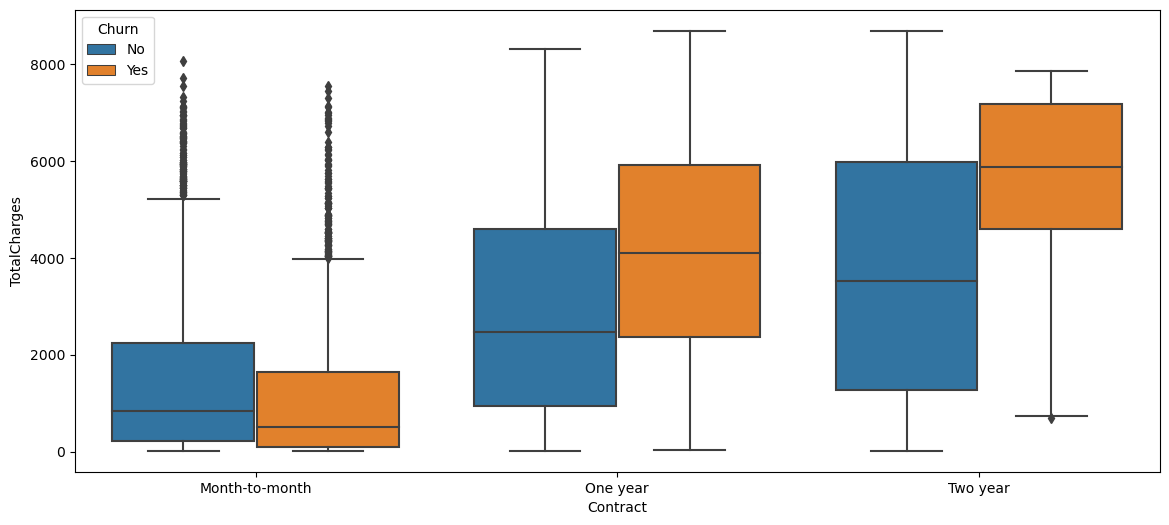

In [12]:
#CODE HERE
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')

The hue allows me to see that the longer the contract the more likely the customer will not 'Churn'.

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

I pull the list of column names.

In [13]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

I use the list to grab the column name of the numerical columns to drop and create a categorical only data set.

In [14]:
cdf=df.drop(['customerID','tenure','MonthlyCharges','TotalCharges'],axis=1)

Pandas has a method to seperate out the unique values of the column and creates new columns for each with a numerical represntive value. 

In [15]:
cdf=pd.get_dummies(cdf,drop_first=False)

Now that the values are switch to a numeric respresentitive, I can run the correlation and save it as a new set.

In [16]:
cdf_ch=cdf.corr()

Focus on the 'Churn Yes' column and sort the values from low to high. Meaning least influential to most influential in whether a customer will Churn.

In [17]:
cdf_ch['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

It appears the largest influence on customer churn is 'Contract_Month-to-month'.
I'll save this list as a new variable.

In [18]:
cdf_chy=cdf_ch['Churn_Yes'].sort_values().iloc[1:-1]

Check the variable.

In [19]:
cdf_chy.values

array([-0.30155234, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.19145432, -0.17822502,
       -0.17126992, -0.16471591, -0.16312844, -0.14998193, -0.13468684,
       -0.12414143, -0.118136  , -0.09077285, -0.08230697, -0.06619252,
       -0.0326536 , -0.0116914 , -0.0116914 , -0.00854464,  0.00854464,
        0.0116914 ,  0.04003274,  0.06085994,  0.06325398,  0.12843503,
        0.1309203 ,  0.14998193,  0.15054105,  0.16312844,  0.19145432,
        0.25205563,  0.26759512,  0.30145464,  0.30746259,  0.3368771 ,
        0.3422352 ,  0.40456455])

Now I can plot these values in a bar graph.

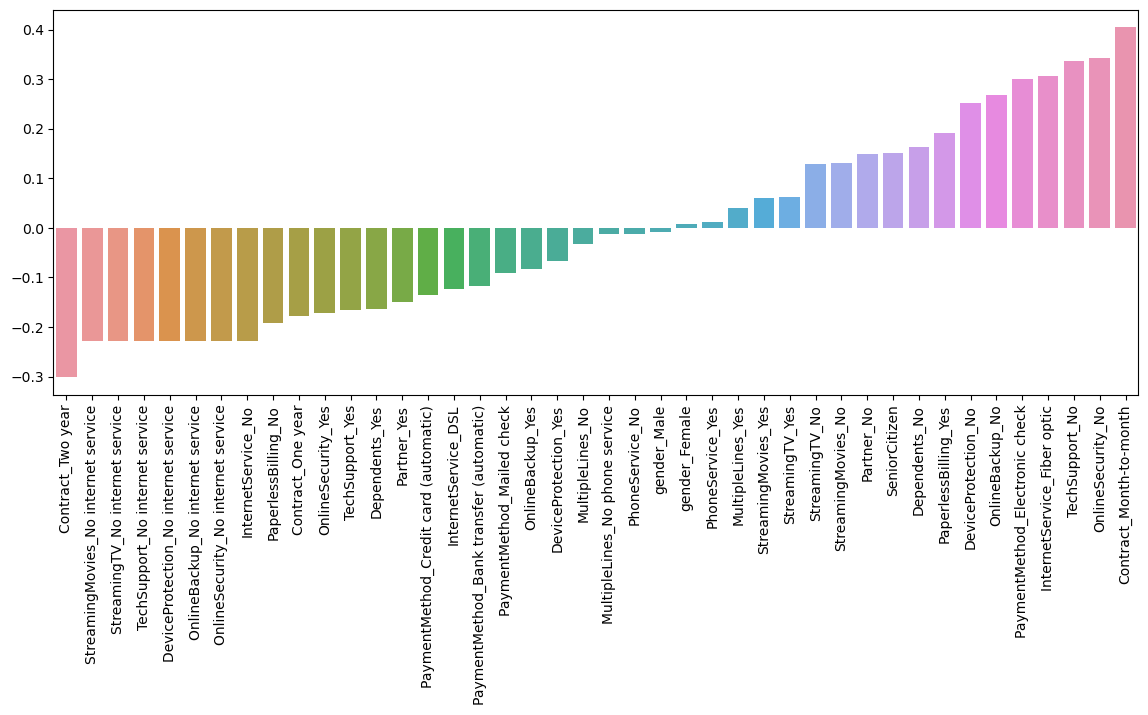

In [20]:
plt.figure(figsize=(14,5))
sns.barplot(x=cdf_chy.index,y=cdf_chy.values)
plt.xticks(rotation=90);

I can see the categories and the level of influence they have on whether a customer will churn or not. The 'Contrat_Month-to-month' as I state before is the highest influence with 'Contract_Two year' being on the oposite side of the spectrum. the opposite mean influence to stay and not churn.

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

I can find the 3 types by using the .unique method, which pulls the unique values of a column.

In [21]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

I look at the bar plot above and see that both the 'One year'and 'Two year' are influences to not churn.

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been a customer.**

I use Seaborn and matplotlib to create and adjust a histogram of 'tenure'.

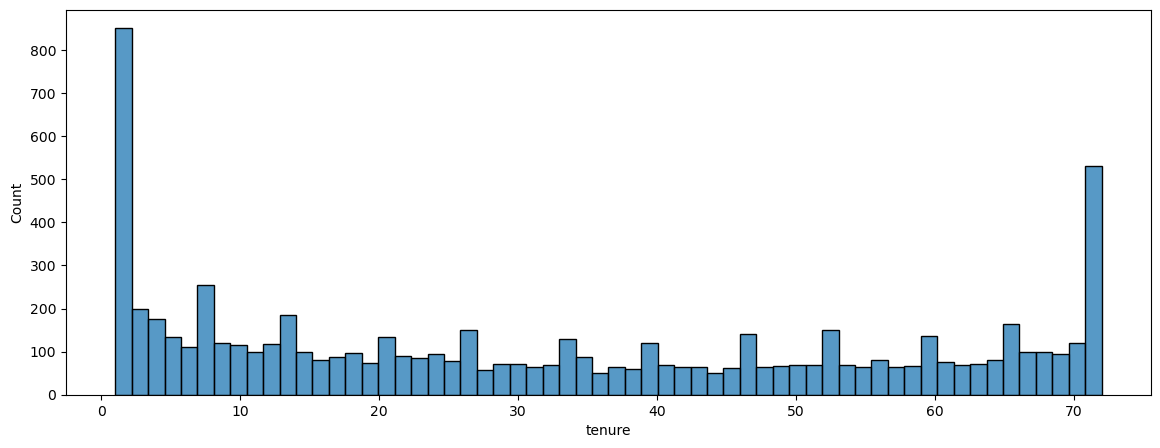

In [22]:
#CODE HERE
plt.figure(figsize=(14,5))
sns.histplot(data=df,x='tenure',bins=60);

I should probably add some titles to the plot. The 'tenure' is in months, 'count' is number of customers. There seems to be a group that doesn't make it a year. I would guess these are the month-to-month customer. There is also a group above 70 months. I would think that these would be the 'Contract_Two year' customers.

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

I went to seaborn.pydata.org/tutorial/axis_grids.html to figure out how to make this multi-plot.

<Figure size 1000x300 with 0 Axes>

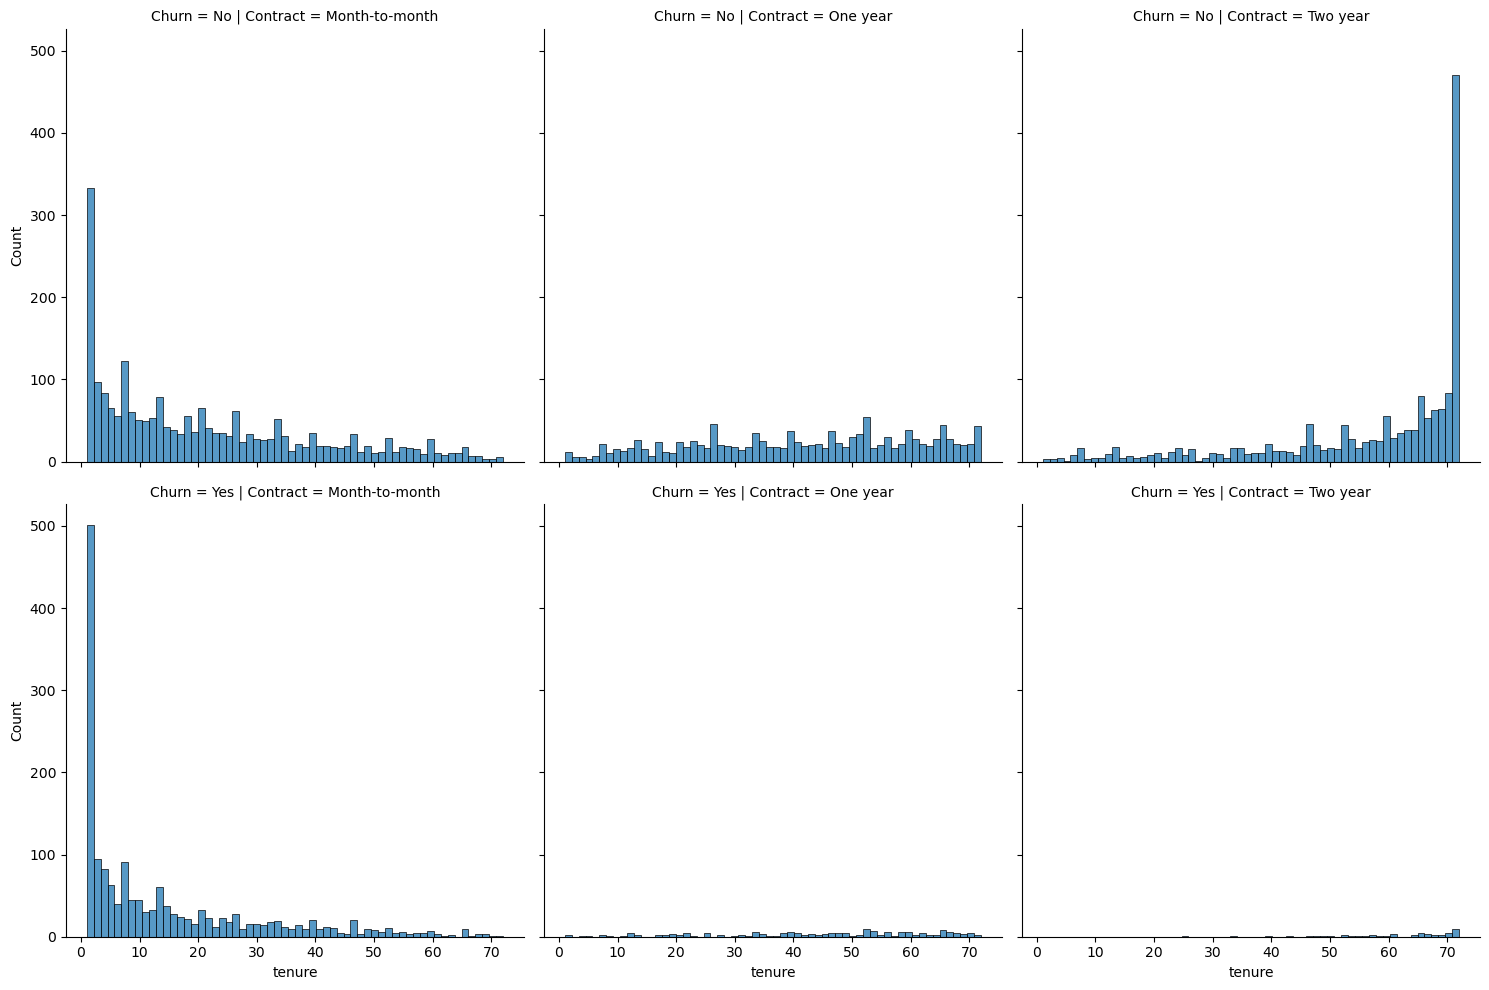

In [23]:
#CODE HERE
plt.figure(figsize=(10,3))
sns.displot(data=df,x='tenure',bins=60, col="Contract", row="Churn")

I think this is a handy graph to help us see the difference in contract type and the amount of customer churn. It is interesting to see that even with the two year contract type there are customers that churned. Most likely churned after the contract expired, you can see little blips after 24 months.

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

I grab the column names again to make sure I spell them correctly and are in the correct format.

In [24]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Next I make a scatter plot using 'MonthlyCharges' for the x axis and 'TotalCharges' for the y axis. The hue or colors are based on 'Churn'.

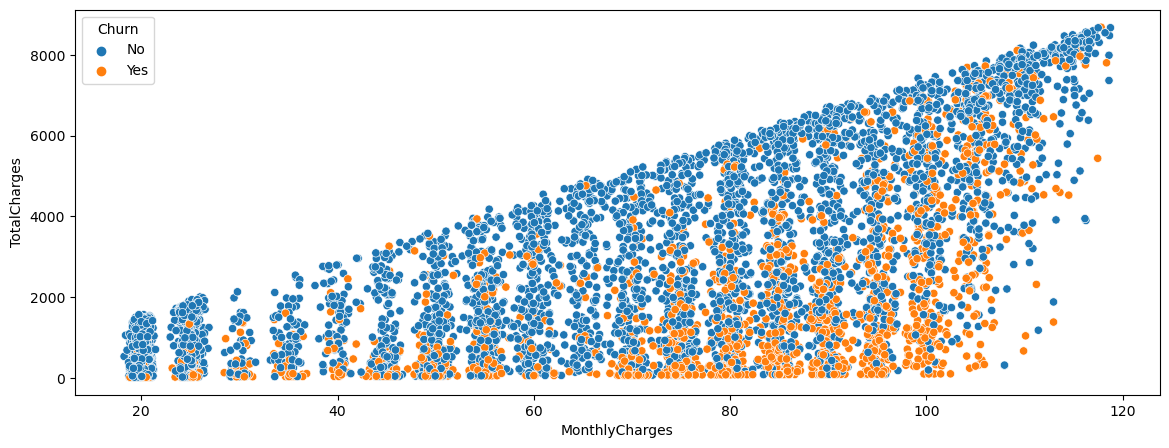

In [25]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn');

I should probably adjust the alpha value (which adjusts the dot transparancy), to make it easier to see if there are data pooints on top of other data points.

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

I start by dividing the 'Churn' column into two groups: yes_churn and no_churn.

In [26]:
#CODE HERE
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

Then create the churn_rate variable, which is yes_churn percentage

In [ ]:
churn_rate=100*yes_churn/(no_churn+yes_churn)

Then I transpose the group so it shows the high to low percent

In [27]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

I save this transposed group as churn rate transposed 'crt'

In [28]:
crt=churn_rate.transpose()['customerID']

Then I can graph this group to see the relation of churn rate to the tenure of being a customer.

<AxesSubplot:xlabel='tenure', ylabel='customerID'>

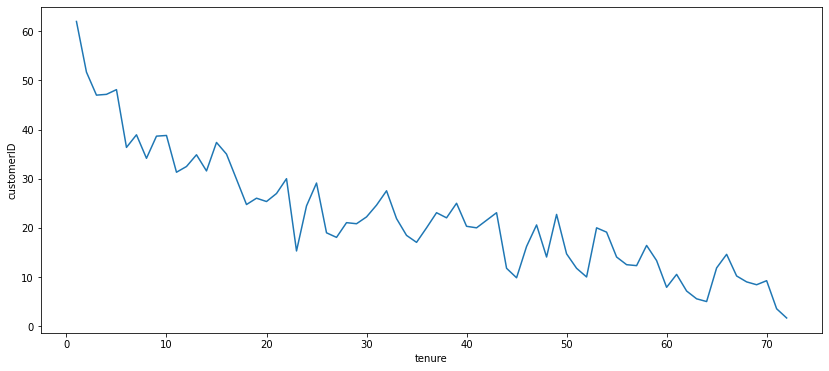

In [29]:
#CODE HERE
plt.figure(figsize=(14,6))
sns.lineplot(data=crt)

The graph shown above indicates the longer they have been a customer the less likely they will churn.

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

I write a function to divide the tenure column in to the groups requested.

In [30]:
# CODE HERE
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

Create a new column in the dataframe tenure cohort 't_c' and run the tenure column through the function.

In [31]:
df['t_c']=df['tenure'].apply(cohort)

Check the data frame to make sure it worked the way I wanted by looking at the first few rows of 'tenure' and 't_c'.

In [32]:
df[['tenure','t_c']].head(10)

,tenure,t_c
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


Looks like the categories are lining up with the tenure time.

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

Use seborn to create a scatterplot of 'MonthlyCharges' vs 'TotalCharge' and color it by using the new column 't_c'.

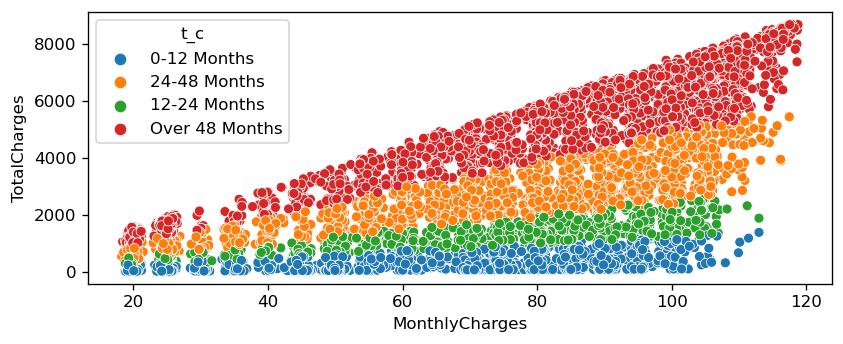

In [33]:
#CODE HERE
plt.figure(figsize=(8,3),dpi=120)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='t_c');

The graph tells me the longer the customer is a customer the more money they will end up spending. It doesn't seem like the monthly charge effects how long they will be a customer. There are some long-term customers in the high monthly charge area.

**TASK: Create a count plot showing the churn count per cohort.**

I put the 't_c' column in a count plot to see the density of customers per time they have been a customer.

<AxesSubplot:xlabel='t_c', ylabel='count'>

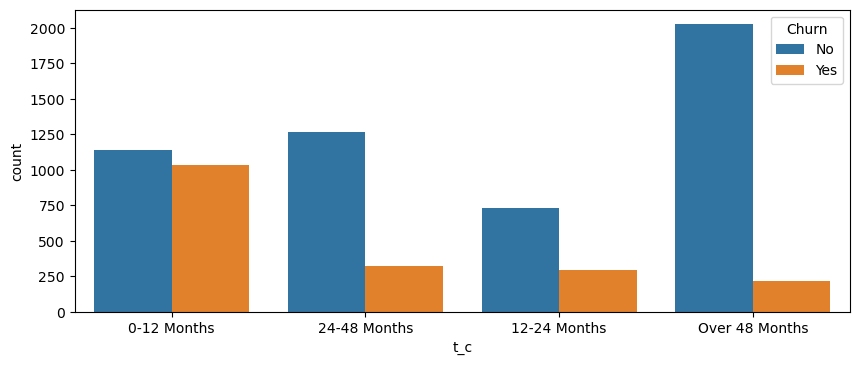

In [34]:
# CODE HERE
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='t_c',hue='Churn')

It appears there are fewer customers that churn after they have been a customer for over 12 months.

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

Now I take the previous chart and break it into contract type to see how it affects the time they are a customer.

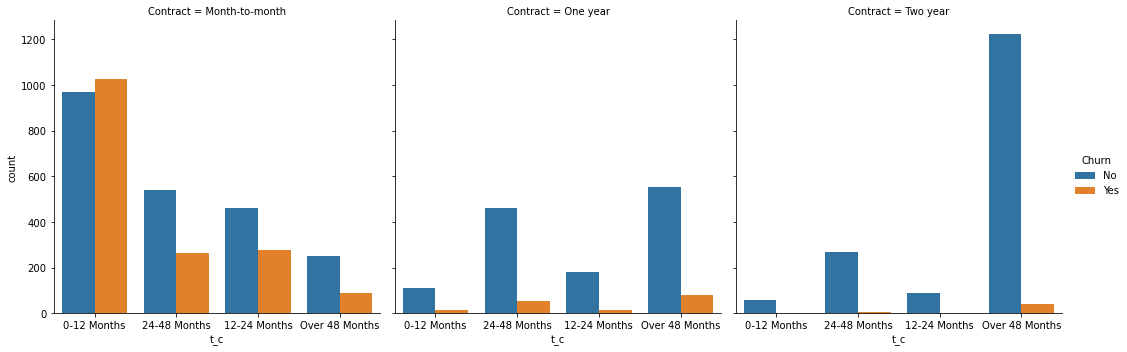

In [35]:
#CODE HERE
sns.catplot(data=df,x='t_c',col='Contract',hue='Churn',kind='count');

It appears the contract reduces the amount of churn in the first few months. The customer doesn't want to break the contract.

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [36]:
#CODE HERE
X=df.drop(['customerID','Churn'],axis=1)

In [37]:
X=pd.get_dummies(X,drop_first=True)

In [38]:
y=df['Churn']

In [8]:
from sklearn.model_selection import train_test_split

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [40]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model=DecisionTreeClassifier(max_depth=5)

In [43]:
# help(DecisionTreeClassifier)

In [44]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
base_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [47]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={'max_depth':[5,6,7]}

In [50]:
grid=GridSearchCV(model,param_grid)

In [51]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [5, 6, 7]})

In [52]:
grid.best_params_

{'max_depth': 5}

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


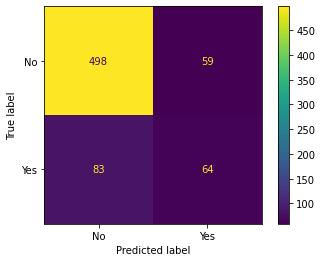

In [53]:
plot_confusion_matrix(model,X_test,y_test)

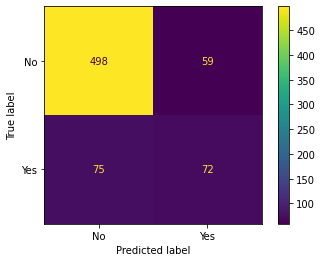

In [55]:
model.feature_importances_

array([0.00817464, 0.45223938, 0.02797279, 0.04331073, 0.        ,
       0.        , 0.        , 0.00754192, 0.        , 0.00799877,
       0.34022334, 0.        , 0.        , 0.00567638, 0.        ,
       0.00578629, 0.0284796 , 0.        , 0.        , 0.00852294,
       0.        , 0.        , 0.        , 0.        , 0.00962181,
       0.02332128, 0.        , 0.        , 0.03113012, 0.        ,
       0.        , 0.        , 0.        ])

In [57]:
dffi=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

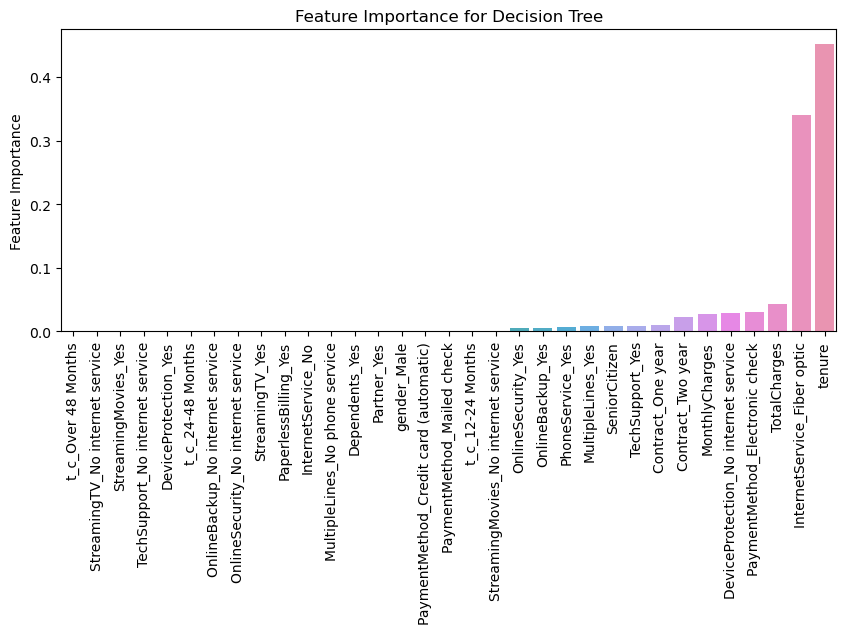

In [58]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=dffi.index,y=dffi['Feature Importance'])
plt.title("Feature Importance for Decision Tree")
plt.xticks(rotation=90);

In [59]:
from sklearn.tree import plot_tree

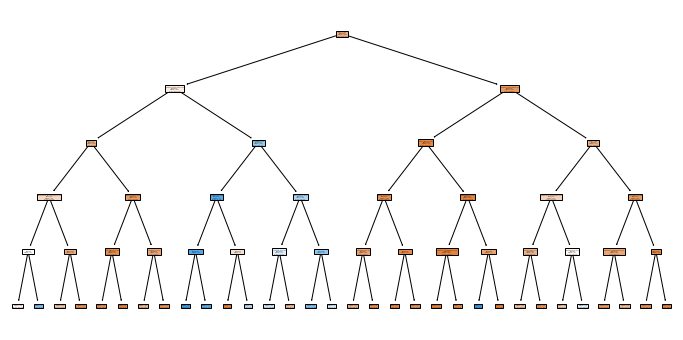

In [61]:
plt.figure(figsize=(12,6))
plot_tree(model,feature_names=X.columns,filled=True);

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [62]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
rfc=RandomForestClassifier(n_estimators=100)

In [64]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
rf_preds=rfc.predict(X_test)

In [66]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.45      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.79      0.79      0.79       704



              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



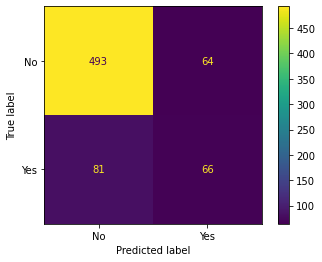

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test,rf_preds) 

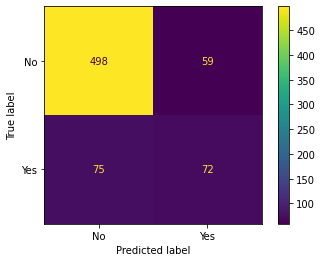

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [68]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier

In [69]:
abm=AdaBoostClassifier()

In [70]:
abm.fit(X_train,y_train)

AdaBoostClassifier()

In [71]:
ab_pred=abm.predict(X_test)

In [72]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



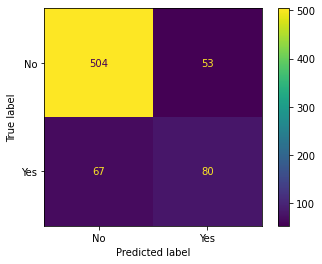

In [73]:
ConfusionMatrixDisplay.from_estimator(abm,X_test,y_test)

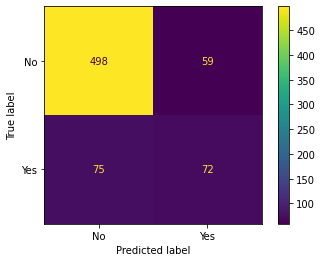

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!